# Intuition of pricing

In [1]:
import graphviz

In [2]:
%%html
<style>
table {float:left}
</style>



## Préambule

### Quelques raccourcis sémantiques (et anglicismes) envahissants : 

- **Pricing**: Valorisation, détermination du prix
- **S**: désigne le token risqué (ex: ETH)
- **B**: designe l'actif non risqué, le stable coin, qui jour le rôle de cash (B for Bank)
- **Spot**: prix du token risqué S

## Valoriser/Pricer, un concept facile?

Etudions le concept de pricing autour d'exemples (presque) tirés de la vie courante.

### Exemple 1 : fair coin toss

L'expérience simple : vous lancez une pièce non biaisée et gagnez 1€ si le résultat est **Pile**, 0 sinon.


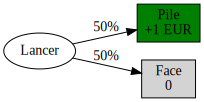

In [3]:
graphviz.Source.from_file(r"data/graphviz/faircoin_fr.dot")

**Combien êtes vous prêts à payer pour jouer à ce jeu?**

Il est fréquent de répondre : 0.5€, qui correspond à l'espérance, ou la valeur moyenne de l'éxpérience sur une grand nombre de réalisations. 

Quelques pistes pour comprendre pourquoi ca n'est pas **le** prix de cette expérience :

1. Les parieurs du scénario **rouge** à la roulette payent un équivalent supérieur à 0.50€.
2. Si le gain du scénario **Pile** était ajusté à 1 million d'€, seriez vous prêts à payer 499k€?
3. Même question en considérant que vous êtes milliardaire.

**Conclusion 1** : la valeur d'un lancer d'une pièce non biaisée dépend d'un équilibre des agents présents et de leur aversion au risque.

### Exemple 2 : theoretical bookmaker

* Vous êtes un bookmaker, expert de votre domaine, à tel point que vous connaisez précisément les probabilités que les équipes A et B gagnent respectivement. 
* Vous disposez aussi des montants pariés sur chaque équipe
* (à la manière du PMU) Vous proposez une des cotes une fois les paris fermés.

Résumons tout ça dans le tableau suivant :

  x  |Team A | Team B
-----|-------|-------
Proba| 20%   |   80%
Bets | 100€  |   500€
Cotes #1| 5.0   | 1.25
Cotes #2| 6.0   | 1.20

### Calculs des gains en fonctions des scénarios de cotes


    
| Scenario |          Victoire A           |           Victoire B            |              Esperance               |
| -------- | :---------------------------: | :-----------------------------: | :----------------------------------: |
| Cotes #1 | **100**  (600- 5x100)         | **-25** (600-1.25x500)          | **0** (20%x100 - 80%x25)            |
| Cotes #2 |  **0**   (600- 6x100)         | **0**   (600-1.20X500)          | **0**                                |



**Conclusion 2** 

* Une légère dégradation des cotes #2 permettra de dégager un gain certains dans les deux cas (Victoire de A ou B)
* Le concept de risque de perte, et par opposition, le concept de gain certain sont des notions fondamentales dans la définition d'un prix.


### Exemple 3 : Morpion à gratter

Quel prix seriez vous prêts à payer ce ticket de morpion? 

⚠⚠⚠ *Sachant que si la case du milieu se révèle être une croix il vous fera gagner* **1000€** ⚠⚠⚠

![morpion](data/images/morpion.png)

**Conclusion 3** : parfois (souvent?) besoin de modèle pour le pricing, qui pose les bases de notre compréhension de notre environement et des risques que nous acceptions de prendre.


## Pricing par absence d'arbitrage

### Arbitrage

La notion de *gain sans risque* (ou freelunch) traduit cette idée d'arbitrage. 

Plus rigoureusement, on appelle arbitrage, tout portefeuille d'actifs $V$, dont : 

1. $V_0=0$ (La valeur en $0$ est nulle)
2. $\mathbb{P}(V_1 \geq 0) = 1$ (n'a jamais de P&L négatif)
3. $\mathbb{P}(V_1 > 0) > 0$ (a des chances d'avoir un P&L strictement positif)

Un tel portfeuille, s'il existe, est intéressant pour tout agent. Il ne nécessite aucune immobilisation de fonds, et à une chance non nulle de rapporter de l'argent sans aucun risque.

### Exemples d'arbitrage?

1. [Spatial](https://en.wikipedia.org/wiki/Arbitrage#Spatial_arbitrage) : deux DEX proposants le même token S à deux prix différents
2. [Triangular](https://en.wikipedia.org/wiki/Arbitrage#Spatial_arbitrage) : séquence de swaps profitable, S -> U -> Z -> S


**Note** : Ces arbitrages font toujours apparaitre des risques (notamme d'exécution). L'appellation d'arbitrage est donc toujours surfaite.




#### Abscence d'Opportunité d'Arbitrage (ou AoA)

Si tout agent est intéressé à détenir un tel portfeuille, on peut estimer raisonnable que l'opportunité disparaisse, et donc qu'il n'existe plus d'arbitrage dans un état stable du marché.

**Dans les études de pricing, il est fréquent de supposer l'AoA comme première hypothèse.**

### La réplication : la bonne intuition du pricing


* Soit $X$ une expérience à laquelle on peut participer en payant $\Pi$
* Soient $B$ et $S$ les actifs basiques, non risqué et risqué, dont les prix sont connus à tout instant.

**Pricing par réplication**

Supposons l'**AoA**. 

S'il existe un portefeuille $V$ constitués d'actifs basiques ($\omega_1$ de $B$, $\omega_2$ de $S$, ...), qui permet de répliquer le résultat de $X$ *dans tous les états futurs du monde*, alors le prix de l'éxpérience $\Pi$ est le prix en $V_0= \omega_1 B+\omega_2 S$, en date $0$ du portefeuille $V$.

#### Démonstration

L'idée est de construire un arbitrage. Commencons par le cas où $V_0 > \Pi$. Alors, vendre le portefeuille $V$ permet de payer $\Pi$ (avec une petite marge non nulle en notre faveur). Le résultats de $X$ et de $V$ se compensent dans tous les futurs états du monde, nous avons donc gagné la marge, sans aucun risque. => impossible.

Le raisonnement similaire tient dans le cas où $V_0 < \Pi$.

Il faut donc que $\Pi = V_0$.

## Le Modèle Binomial : tout y est!

Le modèle binomial représente le monde d'une manière simplifiée. 

Il permet cependant d'introduire les idées fondamentales derrière le pricing d'options, et mérite donc d'être étudier.

### Description du monde

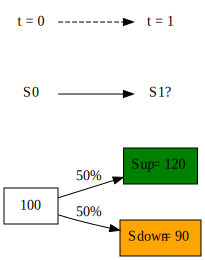

In [4]:
graphviz.Source.from_file(r"data/graphviz/binomial.dot")

**Variables** 

* $S_0$: le prix initial (ici $100$)
* $S_{up}$: la valeur à l'étape *up* (ici $120$)
* $S_{down}$: la valeur à l'étape *down* (ici $90$)
* La probabilité historique, appelée $\mathbb{P}$, définie par:
  * $p$: la probabilité du scénario *up* (ici 50%)
  * $q$: la probabilité du scénario *down* (ici 50%)

#### Arbitrage?

Observons que :

$$S_0 = 100 < \mathbb{E}(S_1) = \frac{1}{2}(120+90) = 105$$

S'agit-il d'une opportunité d'arbitrage?

**NON**. Dans la logique de cette section, nous savons qu'acheter un token $S$ au temps 0 est pas un arbitrage car:

* Le scénario *down* produit une perte nette (le gain n'est donc pas certain)
* Il s'agit d'un équilibre de marché; qui traduit ici une certaine aversion au risque.

### Calcul du prix d'un Call strike 100

Au temps $1$, la valeur de ce Call (noté $C_1^{100}$) sera :

* $20$ dans le scenario *up* (où $S_{up}=120$)
* $0$ dans le scenario *down* (où $S_{down}=90$)

La moyenne, au temps 1, du prix du $C_1^{100}$ est $\mathbb{E}(C_1^{100}) = \frac{1}{2}(20+0) = 10$.

**$\implies$ Peut on conclure que le prix du Call en temps $0$ est $10$?**

#### Abordons la question sous l'angle de la réplication. 

1. Construisons un portefeuille, qu'on note $V$, dont les positions sont $h=(x, y)$
   * $x$ représente la quantité de cash $B$
   * $y$ représente la quantité de token risqué $S$
2. Nous souhaitons qu'il réplique la valeur du call au temps 1, dans les deux cas:
   * ```__up```: $x + y \times 120 = 20$
   * ```down```: $x + y \times 90 = 0$

$\implies$ On trouve $y=2/3$ et $x=-60$.

**Quel est le coût d'entrer dans cette position à l'étape $0$?**

$
\begin{aligned}
  V_0 &= x + y \times S_0 \\
      &= -60 + \frac{2}{3} \times 100 \\
      &\sim 6.6
\end{aligned}
$

Pour des raisons d'arbitrage, le price du Call est $6.6$, et non $10$:

* Si quelqu'un est prêt à acheter un Call à $10$; il vaut lui vendre et initier les positions de $V$ $\implies$ gain de $3.4$.
* Si quelqu'un est prêt à vendre un Call à 5; il faut lui acheter et vendre le portefeuille $V$ $\implies$ gain de $1.6$.

#### Construction de la probabilité Risque Neutre

*Note*: le portefeuille de réplication n'a jamais fait intervenir la probabilité historique $\mathbb{P}$.

Sous la probabilité historique $\mathbb{P}$ nous avions $S_0 \neq \mathbb{E}^{\mathbb{P}}(S_1)$. Phénomène qui traduisait l'aversion au risque des acteurs en présence.

Il serait intéressant de **construire** une probabilité, notée $\mathbb{Q}$, pour laquelle $S_0 = \mathbb{E}^{\mathbb{Q}}(S_1)$. Cette probabilité neutraliserait l'aversion au risque. On l'appelle **probabilité risque neutre**.



Notons $\hat{p}$ et $\hat{q}$ les chances des scénarios *up* et *down* sous la proba $\mathbb{Q}$.

On cherche $S_0 = 100 = \hat{p} \times 120 + (1-\hat{p}) \times 90$

On trouve $\hat{p} = 1/3$ et $\hat{q} = 2/3$.

$\implies$ bien différentes des 50% de la probabilité historique.

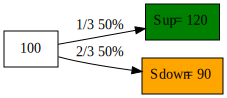

In [5]:
graphviz.Source.from_file(r"data/graphviz/binomial_riskneutral.dot")

#### Pricing du Call sous la probabilité risque neutre

Calculons l'espérance du prix du call à l'étape $1$; avec cette nouvelle probabilité risque neutre $\mathbb{Q}$.

$\mathbb{E}^\mathbb{Q}(C_1^{100}) = \frac{1}{3} \times 20 \sim 6.6$

$\implies$ nous retrouvons le prix du portefeuille de réplication!

## Conclusions

1. Contrairement à l'intuition, le pricing d'un produit/expérience/option n'est pas la moyenne de sa valeur future.
2. C'est **la réplication** de ce produit qui permet son pricing,
3. En supposant qu'il n'y a pas d'**arbitrage** (pas de free lunch)
4. On retombe sur notre intuition, en construisant *volontairement* une nouvelle probabilité
5. Sous **la probabilité risque neutre**, la valeur d'une option est bien la moyenne de sa valeur future